In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score,plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [2]:
loan_df = pd.read_csv(r'C:\Users\kelvin\Downloads\Student Downloads\data\vehicle_loans_feat.csv', index_col='UNIQUEID')
loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,...,DISBURSED_CAT,DISBURSAL_DIFFERENCE,TOTAL_ACCTS,TOTAL_ACTIVE_ACCTS,TOTAL_OVERDUE_ACCTS,TOTAL_CURRENT_BALANCE,TOTAL_SANCTIONED_AMOUNT,TOTAL_DISBURSED_AMOUNT,TOTAL_INSTAL_AMT,OVERDUE_PCT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,0.038125,0.013442,0.935860,45,Salaried,6,1,0,0,0,...,45k - 60k,0.006029,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.0
537409,0.034612,0.017934,0.743792,45,Self employed,6,1,0,0,0,...,45k - 60k,0.022710,0.002208,0.006944,0.04,0.064978,0.00005,0.00005,0.000078,1.0
417566,0.040888,0.015302,0.936801,45,Self employed,6,1,0,0,0,...,45k - 60k,0.006439,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.0
624493,0.045222,0.018287,0.923267,45,Self employed,6,1,0,0,0,...,45k - 60k,0.007255,0.006623,0.000000,0.00,0.064710,0.00000,0.00000,0.000001,0.0
539055,0.039967,0.014636,0.922208,45,Self employed,6,1,0,0,0,...,45k - 60k,0.006187,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.0


In [3]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols] = loan_df[category_cols].astype('category')

In [4]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [5]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    conf_mat = confusion_matrix(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    #print(conf_mat)
    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes 
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.title('Distribution of Probabilities for Estimated Classes')
    plt.legend(loc='best')
    plt.show()
    
    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

In [6]:
def encode_and_split(loan_df):
    loan_data_dumm = pd.get_dummies(loan_df, prefix_sep='_', drop_first=True)

    x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
    y = loan_data_dumm['LOAN_DEFAULT']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, x_test, y_train, y_test

In [7]:
x_train, x_test, y_train, y_test = encode_and_split(loan_df)

D:\Stats_software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


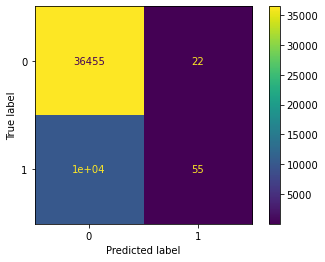



Accuracy:  0.7829555445947974
Precision:  0.7142857142857143
Recall:  0.005416584597203073
F1:  0.010751637181116215
AUC:  0.649055107854111


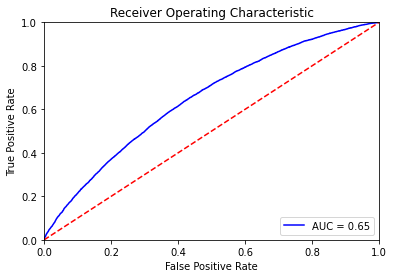

D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


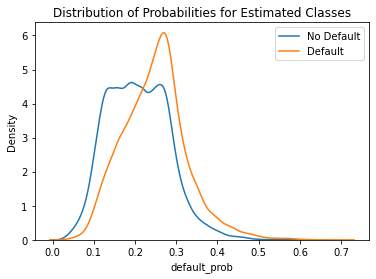

true_class  predicted_class
0           0                  0.999397
            1                  0.000603
1           0                  0.994583
            1                  0.005417
Name: predicted_class, dtype: float64


In [8]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 15)

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

D:\Stats_software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


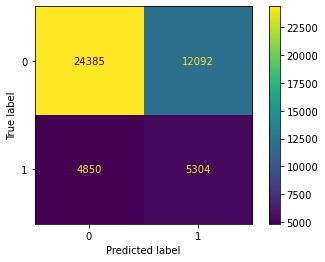



Accuracy:  0.6366794621603654
Precision:  0.3048976776270407
Recall:  0.5223557218830017
F1:  0.3850453720508166
AUC:  0.6405012153516279


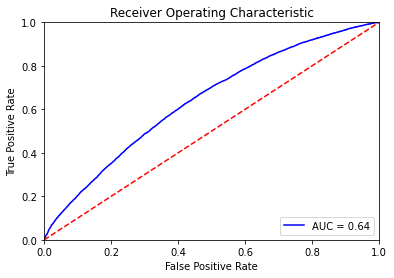

D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


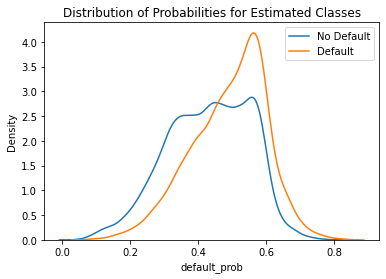

true_class  predicted_class
0           0                  0.668503
            1                  0.331497
1           1                  0.522356
            0                  0.477644
Name: predicted_class, dtype: float64


In [9]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 15, class_weight='balanced')

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

D:\Stats_software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


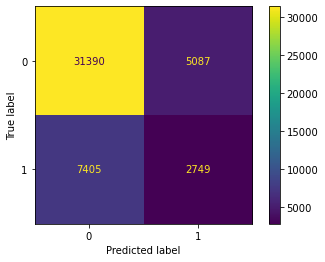



Accuracy:  0.7321095408633741
Precision:  0.3508167432363451
Recall:  0.2707307465038408
F1:  0.30561423012784883
AUC:  0.6417800356512072


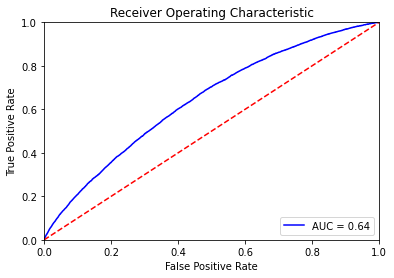

D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


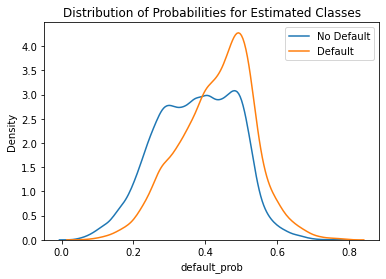

true_class  predicted_class
0           0                  0.860542
            1                  0.139458
1           0                  0.729269
            1                  0.270731
Name: predicted_class, dtype: float64


In [10]:
weights = {0:0.27, 1:0.73}

rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 15, class_weight=weights)

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

In [11]:
train_df = x_train.copy()
train_df['LOAN_DEFAULT'] = y_train

In [12]:
train_minority = train_df[train_df['LOAN_DEFAULT'] == 1]
train_majority = train_df[train_df['LOAN_DEFAULT'] == 0]

In [13]:
train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)

In [14]:
print(train_majority['LOAN_DEFAULT'].value_counts())
print(train_minority_up['LOAN_DEFAULT'].value_counts())

0    146066
Name: LOAN_DEFAULT, dtype: int64
1    146066
Name: LOAN_DEFAULT, dtype: int64


In [15]:
train_up_df = pd.concat([train_majority, train_minority_up])

In [16]:
print(train_up_df['LOAN_DEFAULT'].value_counts())
print(train_up_df['LOAN_DEFAULT'].value_counts(normalize=True))

0    146066
1    146066
Name: LOAN_DEFAULT, dtype: int64
0    0.5
1    0.5
Name: LOAN_DEFAULT, dtype: float64


In [17]:
x_train_up = train_up_df.drop(['LOAN_DEFAULT'], axis=1)
y_train_up = train_up_df['LOAN_DEFAULT']

D:\Stats_software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


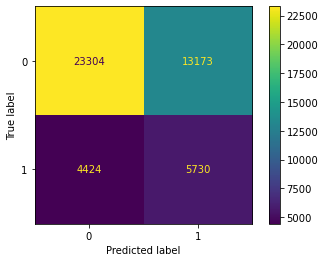



Accuracy:  0.6226330123737428
Precision:  0.30312648785907
Recall:  0.5643096316722473
F1:  0.3943972192586984
AUC:  0.6433502980546387


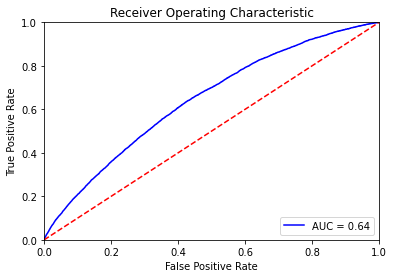

D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


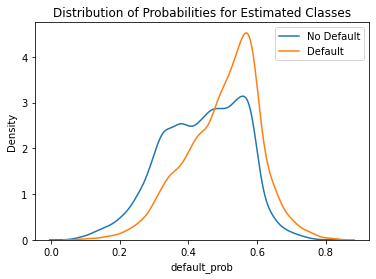

true_class  predicted_class
0           0                  0.638868
            1                  0.361132
1           1                  0.564310
            0                  0.435690
Name: predicted_class, dtype: float64


In [18]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth=15)

rfc_model.fit(x_train_up, y_train_up)
eval_model(rfc_model, x_test, y_test)

In [19]:
def balance_sample(x_train, y_train, sample_mode='up'):
    train_df = x_train.copy()
    train_df['LOAN_DEFAULT'] = y_train

    train_minority = train_df[train_df['LOAN_DEFAULT'] == 1]
    train_majority = train_df[train_df['LOAN_DEFAULT'] == 0]

    train_sampled_df = pd.DataFrame()

    if sample_mode == 'down':
        train_majority_down = resample(train_majority, replace=False,  n_samples=train_minority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_minority, train_majority_down])  
    else:
        train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_majority, train_minority_up])

    x_train_samp = train_sampled_df.drop(['LOAN_DEFAULT'], axis=1)
    y_train_samp = train_sampled_df['LOAN_DEFAULT']

    return x_train_samp, y_train_samp 

In [20]:
#downsample random forest
x_train_dwn, y_train_dwn = balance_sample(x_train, y_train, sample_mode='down')

print(y_train_dwn.value_counts())
print(y_train_dwn.value_counts(normalize=True))

1    40457
0    40457
Name: LOAN_DEFAULT, dtype: int64
1    0.5
0    0.5
Name: LOAN_DEFAULT, dtype: float64


D:\Stats_software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


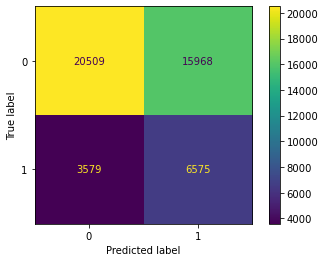



Accuracy:  0.5808153374364693
Precision:  0.29166481834715874
Recall:  0.6475280677565491
F1:  0.4021775698076276
AUC:  0.6469122518182028


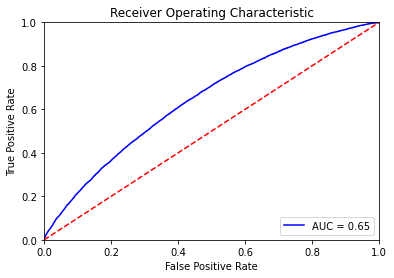

D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Stats_software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


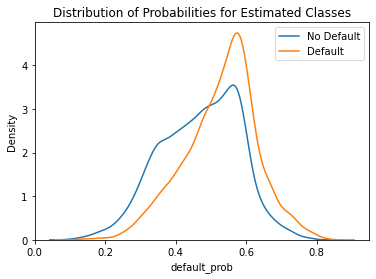

true_class  predicted_class
0           0                  0.562245
            1                  0.437755
1           1                  0.647528
            0                  0.352472
Name: predicted_class, dtype: float64


In [21]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 15)

rfc_model.fit(x_train_dwn, y_train_dwn)
eval_model(rfc_model, x_test, y_test)

In [22]:
smote = SMOTE()

In [23]:
x_train_synth, y_train_synth = smote.fit_resample(x_train, y_train)

In [24]:
vehicle_train_synth = pd.read_csv(r'C:\Users\kelvin\Downloads\Student Downloads\data\vehicle_train_synth.csv')

x_train_synth = vehicle_train_synth.drop(['LOAN_DEFAULT'], axis=1)
y_train_synth = vehicle_train_synth['LOAN_DEFAULT']